In [43]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

Query Date: 2016-08-22
id
station
name
latitude
longitude
elevation


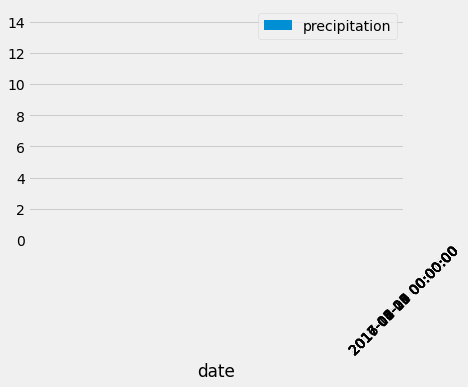

In [71]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 22) - dt.timedelta(days=365)
print("Query Date:", query_date)


inspector = inspect(engine)
#columns = inspector.get_columns('measurement')
#for column in columns:
#    print(column["name"])
inspector = inspect(engine)
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"])

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, func.sum(Measurement.prcp)).\
    filter(Measurement.date > query_date).\
    filter(Measurement.date < "2017-08-23").\
        order_by(Measurement.date).\
        group_by(Measurement.date).\
        all()
#results

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(results, columns = ["date", "precipitation"])
precipitation_df['date'] = pd.to_datetime(precipitation_df['date'], format = '%Y-%m-%d')
x = precipitation_df['date']
precipitation_df.set_index('date', inplace = True)
y = precipitation_df['precipitation']
# Sort the dataframe by date
df.sort_values(by='date',ascending=False)
precipitation_df
# Use Pandas Plotting with Matplotlib to plot the data
labels = ['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19', '2017-01-28', '2017-03-09', '2017-04-18', '2017-05-31', '2017-07-10']

precipitation_df.plot.bar()
plt.xticks(x, x[::45], rotation=45)

plt.show()

In [ ]:
#labels = ['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19', '2017-01-28', '2017-03-09', '2017-04-18', '2017-05-31', '2017-07-10']

#plt.xticks(["2016-{:02d}-15".format(x) for x in range(1,13,1)],["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
#plt.xticks(x,labels, rotation ='90')
#plt.figure(figsize=(25,400))

In [56]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,365.000000
mean,0.980137
std,1.778632
min,0.000000
25%,0.050000
50%,0.400000
75%,1.090000
max,14.280000


# Exploratory Station Analysis

In [77]:
# Design a query to calculate the total number stations in the dataset
#for row in session.query(Measurement.station).distinct().all():
#    print(row)
station_count = session.query(Measurement).group_by(Measurement.station).count()
station_count

9

In [95]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_count = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
station_count


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [129]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

highest_temp = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
lowest_temp = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
avg_temp = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
#for rows in highest_temp:
#    print(rows.station, rows.tobs)

print(f'The highest temp recorded was: {highest_temp}')
print(f'The lowest temp recorded was: {lowest_temp}')
print(f'The average temp on record was: {avg_temp}')

The highest temp recorded was: [(85.0,)]
The lowest temp recorded was: [(54.0,)]
The average temp on record was: [(71.66378066378067,)]


In [126]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()